<a href="https://colab.research.google.com/github/samueljos3/ProjetoHeartDisease/blob/main/MachineLearning_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APLICAÇÃO DE ALGUNS MODELOS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/erlonL/Projeto-ICD/main/heart-disease.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
def troca_por_binario(valor_coluna):
  if valor_coluna == "Yes":
    valor_coluna = 1.0
  elif valor_coluna == "No":
    valor_coluna = 0.0
  elif valor_coluna == "No, borderline diabetes":
    valor_coluna = 0.0
  elif valor_coluna == "Yes (during pregnancy)":
    valor_coluna = 1.0
  return valor_coluna
  
df_numeric = df.select_dtypes(include='number')

for coluna in df.columns:
    if coluna not in df_numeric.columns:
      df[coluna] = df[coluna].apply(troca_por_binario)

In [ ]:
df['GenHealthNUM'] = df['GenHealth'].replace({"Poor": 1.0, "Fair": 2.0, "Good": 3.0, "Very good": 4.0, "Excellent": 5.0})
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealthNUM
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,Female,55-59,White,1.0,1.0,Very good,5.0,1.0,0.0,1.0,4.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,Female,80 or older,White,0.0,1.0,Very good,7.0,0.0,0.0,0.0,4.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,Male,65-69,White,1.0,1.0,Fair,8.0,1.0,0.0,0.0,2.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,Female,75-79,White,0.0,0.0,Good,6.0,0.0,0.0,1.0,3.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,Female,40-44,White,0.0,1.0,Very good,8.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,Male,60-64,Hispanic,1.0,0.0,Fair,6.0,1.0,0.0,0.0,2.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,Male,35-39,Hispanic,0.0,1.0,Very good,5.0,1.0,0.0,0.0,4.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,Female,45-49,Hispanic,0.0,1.0,Good,6.0,0.0,0.0,0.0,3.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,Female,25-29,Hispanic,0.0,0.0,Good,12.0,0.0,0.0,0.0,3.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df[["Sex", "Race"]])
ohe_transform.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
df_ohe = pd.DataFrame(ohe_transform.toarray())

In [ ]:
novo_dataset = pd.concat([df, df_ohe], axis = 1)
novo_dataset = novo_dataset.dropna()

In [ ]:
pd.options.display.max_columns = None
novo_dataset.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealthNUM,0,1,2,3,4,5,6,7
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,Female,55-59,White,1.0,1.0,Very good,5.0,1.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,Female,80 or older,White,0.0,1.0,Very good,7.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,Male,65-69,White,1.0,1.0,Fair,8.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,Female,75-79,White,0.0,0.0,Good,6.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,Female,40-44,White,0.0,1.0,Very good,8.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,28.87,1.0,0.0,0.0,6.0,0.0,1.0,Female,75-79,Black,0.0,0.0,Fair,12.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,21.63,0.0,0.0,0.0,15.0,0.0,0.0,Female,70-74,White,0.0,1.0,Fair,4.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,31.64,1.0,0.0,0.0,5.0,0.0,1.0,Female,80 or older,White,1.0,0.0,Good,9.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,26.45,0.0,0.0,0.0,0.0,0.0,0.0,Female,80 or older,White,0.0,0.0,Fair,5.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,40.69,0.0,0.0,0.0,0.0,0.0,1.0,Male,65-69,White,0.0,1.0,Good,10.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
novo_dataset = novo_dataset.rename(columns={0: 'Female'})
novo_dataset = novo_dataset.rename(columns={1: 'Male'})
novo_dataset = novo_dataset.rename(columns={2: 'AmIn/AlNa'})
novo_dataset = novo_dataset.rename(columns={3: 'Asian'})
novo_dataset = novo_dataset.rename(columns={4: 'Black'})
novo_dataset = novo_dataset.rename(columns={5: 'Hispanic'})
novo_dataset = novo_dataset.rename(columns={6: 'Other'})
novo_dataset = novo_dataset.rename(columns={7: 'White'})

In [ ]:
novo_dataset = novo_dataset.drop('Sex', axis=1)
novo_dataset = novo_dataset.drop('Race', axis=1)
novo_dataset = novo_dataset.drop('GenHealth', axis=1)
df2 = novo_dataset

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df2['AgeCategory'] = label_encoder.fit_transform(df2['AgeCategory'])
print(df2)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                0.0  16.60      1.0              0.0     0.0             3.0   
1                0.0  20.34      0.0              0.0     1.0             0.0   
2                0.0  26.58      1.0              0.0     0.0            20.0   
3                0.0  24.21      0.0              0.0     0.0             0.0   
4                0.0  23.71      0.0              0.0     0.0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790           1.0  27.41      1.0              0.0     0.0             7.0   
319791           0.0  29.84      1.0              0.0     0.0             0.0   
319792           0.0  24.24      0.0              0.0     0.0             0.0   
319793           0.0  32.81      0.0              0.0     0.0             0.0   
319794           0.0  46.56      0.0              0.0     0.0             0.0   

        MentalHealth  DiffW

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_hd = df2.iloc[:, 1:-1].values
y_hd = df2.iloc[:, 0].values

In [ ]:
x_hd_treinamento, x_hd_teste, y_hd_treinamento, y_hd_teste = train_test_split(x_hd, y_hd, test_size = 0.20, random_state = 0)


In [ ]:
hd_data = GaussianNB()
hd_data.fit(x_hd_treinamento, y_hd_treinamento)

GaussianNB()

In [ ]:
previsoes = hd_data.predict(x_hd_teste)

In [ ]:
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_hd_teste

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_hd_teste, previsoes)

0.8343626385653309

In [ ]:
confusion_matrix(y_hd_teste, previsoes)

array([[50636,  7876],
       [ 2718,  2729]])

0.8343626385653309

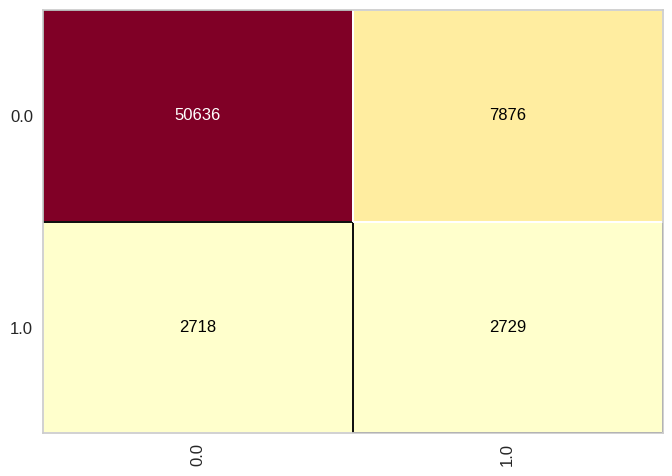

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(hd_data)
cm.fit(x_hd_treinamento, y_hd_treinamento)
cm.score(x_hd_teste, y_hd_teste)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_hd = DecisionTreeClassifier(criterion = 'entropy')
arvore_hd.fit(x_hd, y_hd)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_hd.feature_importances_

array([0.34560411, 0.01744107, 0.00955248, 0.01868082, 0.06473749,
       0.06415739, 0.01764509, 0.13554097, 0.0118286 , 0.02768509,
       0.09762927, 0.01918158, 0.00975114, 0.02068426, 0.08050638,
       0.01208839, 0.00703457, 0.00529245, 0.00338268, 0.0119389 ,
       0.01151377, 0.0081235 ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_hd = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
random_forest_hd.fit(x_hd_treinamento, y_hd_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [ ]:
previsoes = random_forest_hd.predict(x_hd_teste)
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_hd_teste, previsoes)

0.9040166356572179

0.9040166356572179

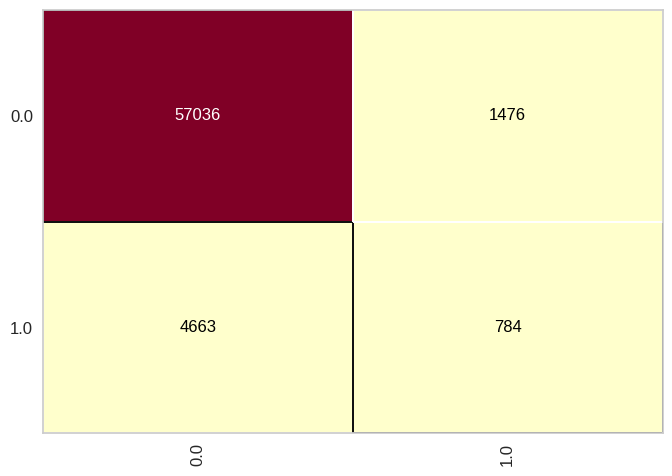

In [ ]:
cm = ConfusionMatrix(random_forest_hd)
cm.fit(x_hd_treinamento, y_hd_treinamento)
cm.score(x_hd_teste, y_hd_teste)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_hd = KNeighborsClassifier(n_neighbors = 10)
knn_hd.fit(x_hd_treinamento, y_hd_treinamento)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
previsoes = knn_hd.predict(x_hd_teste)
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_hd_teste, previsoes)

0.9138197908034835

0.9138197908034835

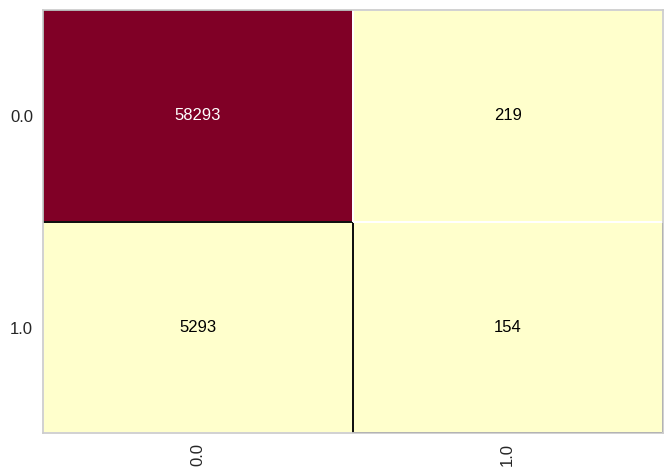

In [ ]:
cm = ConfusionMatrix(knn_hd)
cm.fit(x_hd_treinamento, y_hd_treinamento)
cm.score(x_hd_teste, y_hd_teste)